# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [264]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [266]:
# Your code here.
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

Text(0, 0.5, 'Tarides')

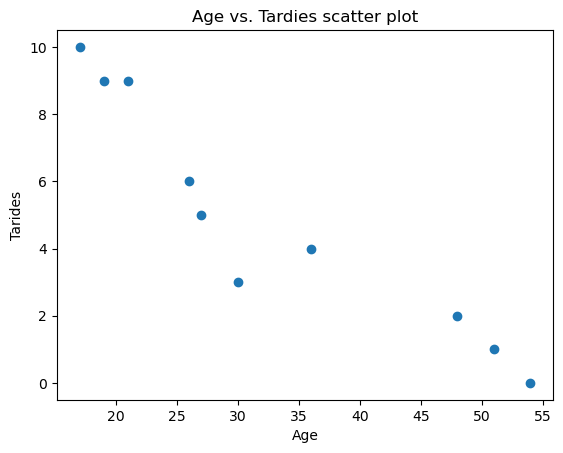

In [268]:
# Your code here
# Create the scatter plot
plt.scatter(student_data['Age'], student_data['Tardies'])

# Add title and labels
plt.title('Age vs. Tardies scatter plot')
plt.xlabel('Age')
plt.ylabel('Tarides')

# Display the plot


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

*your explanation here*

It seems that the tardies dimishes linearly with the age.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [272]:
# your code here
# Calculate covariane
## Calculate the mean for each variable
age_mean = student_data['Age'].mean()
tardies_mean = student_data['Tardies'].mean()
print(age_mean)
print(tardies_mean)
## Calculate the number of data points
n = len(student_data)

## Calculate deviation from the mean for each variable
student_data['dev_age'] = [(element - age_mean) for element in student_data['Age']]
student_data['dev_tardies'] = [(element - tardies_mean) for element in student_data['Tardies']]

# Calculate covariance
student_data['product_dev'] =   student_data['dev_age'] *  student_data['dev_tardies']
cov = student_data['product_dev'].sum() / (n-1)
cov
# !! a negative covariance indicates that as one variable increases, the other tends to decrease



# Calculate the correlation : Pearson Correlation Coefficient
## Calculate standard deviation of each variable
std_age = student_data['Age'].std()
std_tardies = student_data['Tardies'].std()
std_age
std_tardies
## Calculate the correlation
r = cov / (std_age * std_tardies)
r
## -> correlation is a mormalized version of covariance (-1 < r < 1). it measures the strength of the linear relation
## in this case where r=-0.93 we have a strong negative linear relation between the two variables



32.9
4.9


-0.9391626886887123

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

(8, 1) (2, 1)
Mean Squared Error: 1.1072950226094305
R-squared Score: 0.9453187643155837


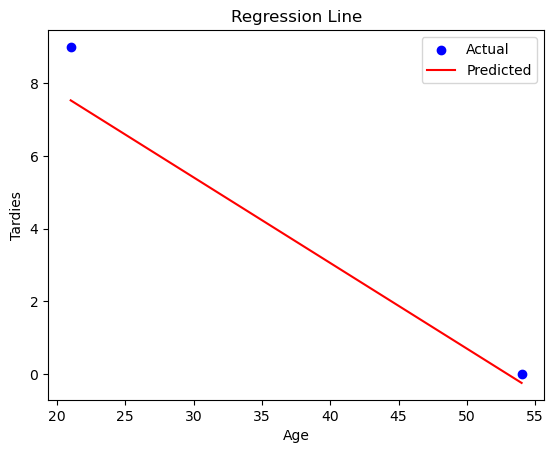

In [274]:
# your explanation here

# By observing the scatter plot it seems that we can say that the variables have a linear relation.
# the strong correlation (r~-0.9) confirms the strong linear relation between two variables

# Define the indepedent (X) and dependent variables (Y)
## dependent variable (Y) is the the one we are trying to predict, in this case (tardies)
X = student_data[['Age']]
y = student_data[['Tardies']] # Target variable / variable to predict

# When building a ML model we need to train the model on some data and then test it to see how well in performs on new, unseen data
# Split data into training (80% of data) and testing sets (20% of data)
# we use the train_test_split from sklearn.model_selection to split the dataset
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split (X,y,test_size = 0.2)

# Print the "size" of training dataset and testing dataset to ensure proper splitting
print(X_train.shape, X_test.shape)

# Train the linear regression model
from sklearn.linear_model import LinearRegression

## Initialize the model
model = LinearRegression()

## Train the model by "fitting" to training data
model.fit(X_train,y_train)


# Make tests (predictions) using "test" data
y_pred = model.predict(X_test)

# Evaluate the model
## Calculate the mean squared error and r-squared score ( 0 < r2 < 1 )
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


# Visualize the regression line (model) against original data
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title("Regression Line")
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.legend()
plt.show()


Plot your regression model on your scatter plot.

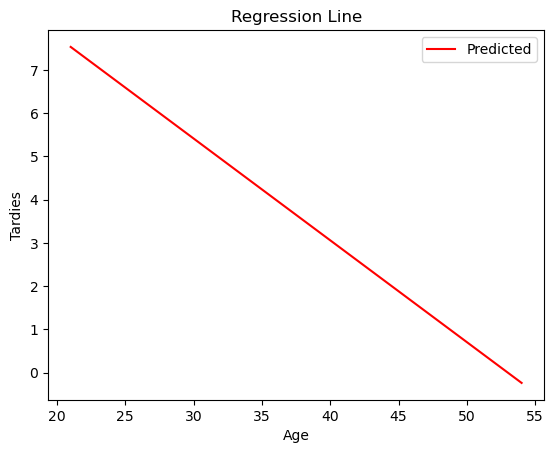

In [276]:
# Your code here.
# Visualize the regression line (model) against original data

plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title("Regression Line")
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.legend()
plt.show()


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

Interpretation of results:
first lets see the range of our target values (tardies): let's says from o to 10 units of time

1. Mean Squared Error (MSE): 1.40 or Root Mean Squared Error (RMSE) =  1.18. This indicates that predictions are about 1.18 units of time away from the actual values. This value is significant given the range of 10 units of time

2. R-squared Score: this explains how well the features / independent variable (age) explains the variability of the dependent / target variable. For well-fitted models, r2 is at least > 0 and = 1 when perfect prediction. In this case, r2 is < 0 which indicate that the model has a very poor fit.


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [280]:
# Import any libraries you may need & the data 
vehicles = pd.read_csv("/Users/tiagovhp/Ironhack/Week_4/Day_3/lab-regression-analysis-en/vehicles.csv")

# Load data into pandas DataFrame
vehicles =pd.DataFrame(vehicles)

# Evaluate first rows
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [281]:
# Check if there are any missing values
vehicles.isnull().sum()



Make                       0
Model                      0
Year                       0
Engine Displacement        0
Cylinders                  0
Transmission               0
Drivetrain                 0
Vehicle Class              0
Fuel Type                  0
Fuel Barrels/Year          0
City MPG                   0
Highway MPG                0
Combined MPG               0
CO2 Emission Grams/Mile    0
Fuel Cost/Year             0
dtype: int64

In [282]:
# Explore basic statistics
round(vehicles.describe(),0)

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
count,35952.0,35952.0,35952.0,35952.0,35952.0,35952.0,35952.0,35952.0,35952.0
mean,2001.0,3.0,6.0,18.0,18.0,24.0,20.0,475.0,1893.0
std,10.0,1.0,2.0,4.0,5.0,6.0,5.0,119.0,507.0
min,1984.0,1.0,2.0,0.0,6.0,9.0,7.0,37.0,600.0
25%,1991.0,2.0,4.0,15.0,15.0,20.0,16.0,395.0,1500.0
50%,2001.0,3.0,6.0,17.0,17.0,24.0,19.0,468.0,1850.0
75%,2010.0,4.0,6.0,21.0,20.0,27.0,23.0,555.0,2200.0
max,2017.0,8.0,16.0,47.0,58.0,61.0,56.0,1270.0,5800.0


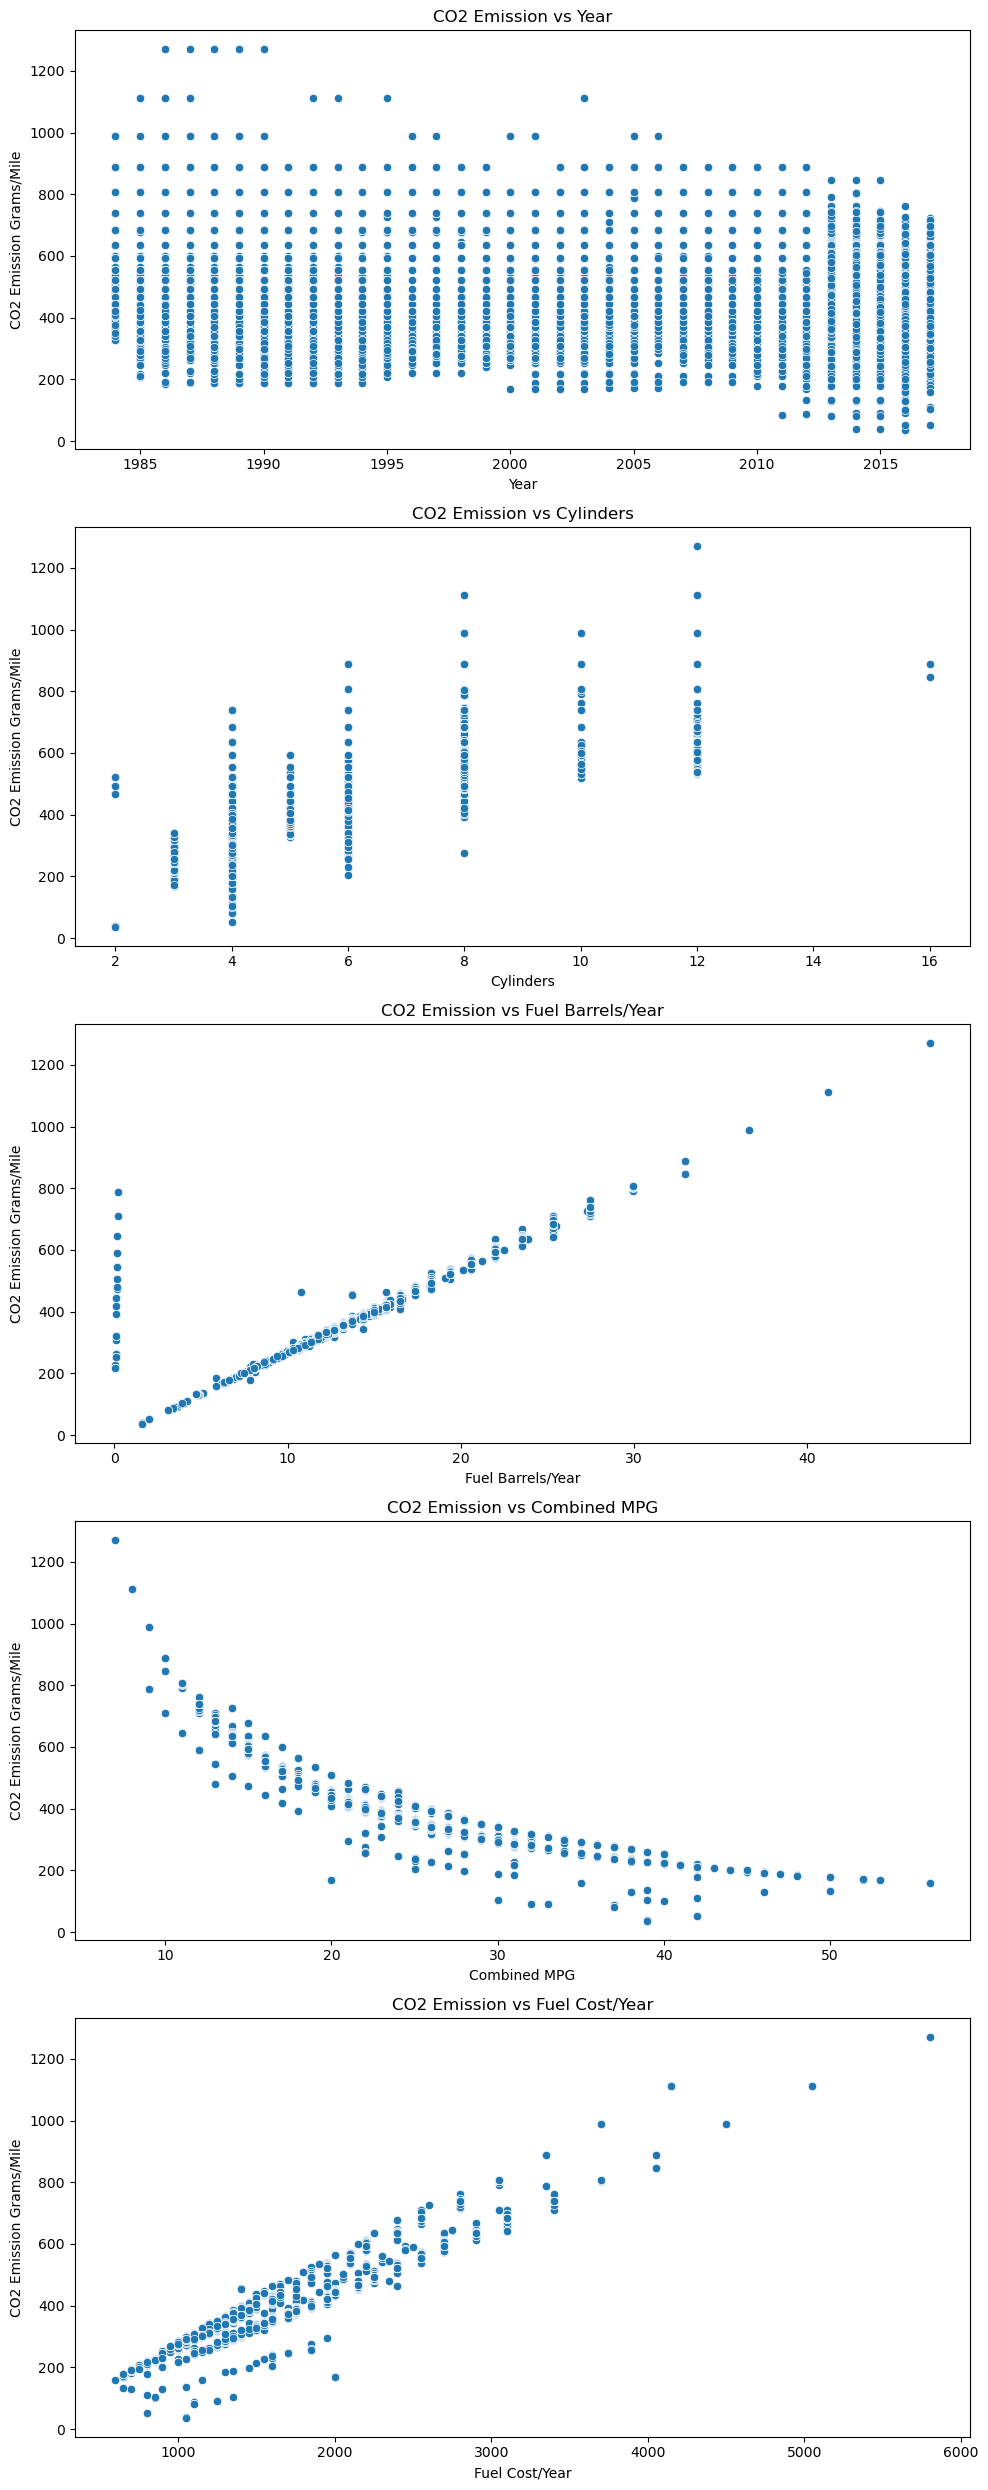

In [292]:
# Visualize the relationship between dependent variable and each independent variable, spearately
import seaborn as sns
import matplotlib.pyplot as plt

# Let's start by dropping non-numerical columns
vehicles = vehicles[['Year', 'Cylinders',
       'Fuel Barrels/Year', 'Combined MPG',
       'Fuel Cost/Year','CO2 Emission Grams/Mile']]

# Define your x variables
xvars = vehicles.drop('CO2 Emission Grams/Mile',axis=1).columns
xvars # Replace with your actual variable names

# Set up the figure
num_vars = len(xvars)
fig, axs = plt.subplots(num_vars, 1, figsize=(10, num_vars * 5))  # Adjust size as needed

# Create pair plots in separate subplots
for i, x in enumerate(xvars):
    sns.scatterplot(data=vehicles, x=x, y='CO2 Emission Grams/Mile', ax=axs[i])
    axs[i].set_title(f'CO2 Emission vs {x}')

plt.tight_layout()
plt.show()

# some independent variables seem to show a linear relationship with the target variables
# note: some show a logaritmic relation

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [338]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     35952 non-null  int64  
 1   Cylinders                35952 non-null  float64
 2   Fuel Barrels/Year        35952 non-null  float64
 3   Combined MPG             35952 non-null  int64  
 4   Fuel Cost/Year           35952 non-null  int64  
 5   CO2 Emission Grams/Mile  35952 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 1.6 MB


In [372]:
# Calculate covariance

## Lets create a series  with the mean for each variable
means = vehicles.mean()

## Calculate nr of datapoints
n = len(vehicles)

## For each variable, calculate deviation of each datapoint to its mean
dev_means = vehicles - means
dev_means

# Calculate covariance of each independent variable and dependent variable
## Year
cov_year = ((dev_means['Year']*dev_means['CO2 Emission Grams/Mile']).sum())/(n-1)
## Cylinders
cov_cyl = ((dev_means['Cylinders']*dev_means['CO2 Emission Grams/Mile']).sum())/(n-1)
## Fuel Barrels/Year
cov_fuelb = ((dev_means['Fuel Barrels/Year']*dev_means['CO2 Emission Grams/Mile']).sum())/(n-1)
## Combined MPG
cov_mpg = ((dev_means['Combined MPG']*dev_means['CO2 Emission Grams/Mile']).sum())/(n-1)
## Fuel Cost/Year
cov_fuelc = ((dev_means['Fuel Cost/Year']*dev_means['CO2 Emission Grams/Mile']).sum())/(n-1)


# Calculate correlation
## st dev of CO2 Emission Grams/Mile 
std_co2 = vehicles['CO2 Emission Grams/Mile'].std()

## Year
std_year = vehicles['Year'].std()
cor_year = cov_year / (std_co2 * std_year)


## Cylinders
std_cyl = vehicles['Cylinders'].std()
cor_cyl = cov_cyl / (std_co2 * std_cyl)

## Fuel Barrels/Year
std_fuelb = vehicles['Fuel Barrels/Year'].std()
cor_fuelb= cov_fuelb/ (std_co2 * std_fuelb)

## Combined MPG
std_mpg = vehicles['Combined MPG'].std()
cor_mpg= cov_mpg/ (std_co2 * std_mpg)

## Fuel Cost/Year
std_fuelc = vehicles['Fuel Cost/Year'].std()
cor_fuelc= cov_fuelc/ (std_co2 * std_fuelc)

print('Correlation between CO2 Emission Grams/Mile and Year:',cor_year)
print('Correlation between CO2 Emission Grams/Mile and Cylinders:',cor_cyl)
print('Correlation between CO2 Emission Grams/Mile and Fuel Barrels/Year:',cor_fuelb)
print('Correlation between CO2 Emission Grams/Mile and Combined MPG:',cor_mpg)
print('Correlation between CO2 Emission Grams/Mile and Fuel Cost/Year:',cor_fuelc)



Correlation between CO2 Emission Grams/Mile and Year: -0.22229960295055745
Correlation between CO2 Emission Grams/Mile and Cylinders: 0.7523925537296278
Correlation between CO2 Emission Grams/Mile and Fuel Barrels/Year: 0.98618866214294
Correlation between CO2 Emission Grams/Mile and Combined MPG: -0.9262290389337312
Correlation between CO2 Emission Grams/Mile and Fuel Cost/Year: 0.9308651512202529


In [ ]:
# strong correlation (>0.9): Fuel Barrels/Year, Fuel Cost/Year, Combined MPG
# medium correlation(>0.75): Cylinders
# weak correlation (<0.25): Year

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [394]:
# Your code here.
# Prepare data for modeling
## split features and target variables
X = vehicles.drop('CO2 Emission Grams/Mile',axis=1)
y = vehicles['CO2 Emission Grams/Mile']

# Split into data training and data test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Check the shapes
print(X_train.shape, X_test.shape)

# Choose the model
from sklearn.linear_model import LinearRegression
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

## Make tests (predictions) using test data
y_pred = model.predict(X_test)

## evaluate the model through mean squared error and r-squared score
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

(28761, 5) (7191, 5)
Mean Squared Error: 271.1492263619662
R-squared Score: 0.9808536263477519


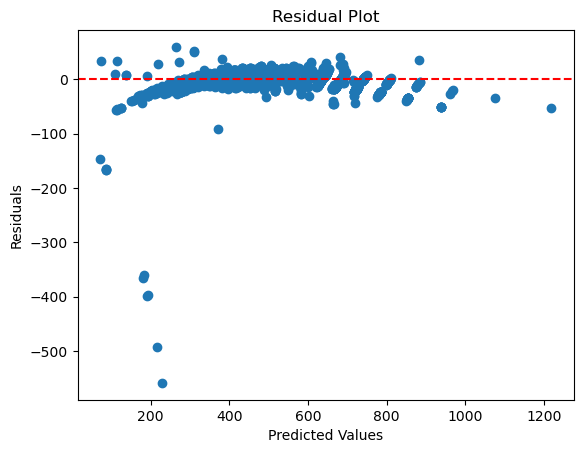

In [396]:
# Visualize model predictions
# Residual plot
plt.scatter(y_pred, y_pred - y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [400]:
## interpretation of residuals: the model has a good fit for CO2 Emission Grams/Mile > 200

1232.571428571429

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [406]:


## interpretation of mse and r2:
## range of our target variable
range = vehicles['CO2 Emission Grams/Mile'].max() - vehicles['CO2 Emission Grams/Mile'].min()
range
## Mean Squared Error: 271.1492263619662 or RMSE = 16,4 meaning that predictions are about 1.18 units of time away from the actual values. 
## This value is very low given the range of 1232 units for CO2 Emission Grams/Mile -> model fits well with the data

## R-squared Score: 0.9808536263477519 is very close to 1 which indicates that the model almost perfectly predicts the data


1232.571428571429

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
#

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [ ]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

*your explanation here*

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [2]:
# Your response here.

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*